# EDA on Titanic Data 

In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("C:/Users/lenovo/python/EDA/train_titanic.csv")
test = pd.read_csv("C:/Users/lenovo/python/EDA/test_titanic.csv")

In [3]:
train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.shape
test.shape

(418, 11)

In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
# find survival rate by gender
train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


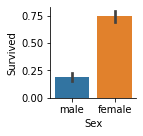

In [11]:
sns.catplot(x='Sex',y='Survived',kind='bar',data=train,height=2)
plt.show()
# female has more probability of survival

In [12]:
# how age affects aurvival
 # sns.FacetGrid(train, col='Survived').map(sns.histplot,'Age',bins=20)


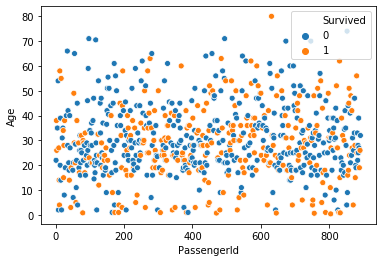

In [13]:
sns.scatterplot(x=train.PassengerId,y=train.Age,hue=train.Survived)
plt.show()


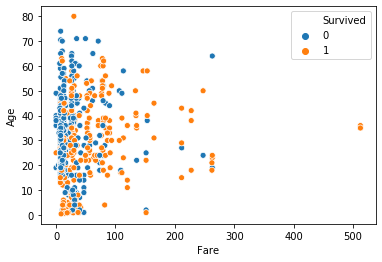

In [14]:
sns.scatterplot(x=train.Fare,y=train.Age,hue=train.Survived)


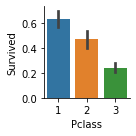

In [15]:
# probability of survival by pclass
sns.catplot(x='Pclass',y='Survived',kind='bar',data=train,height=2)

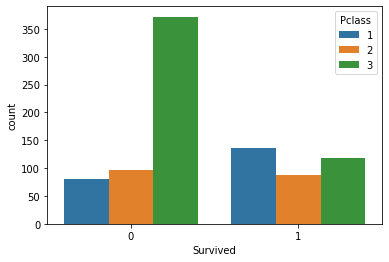

In [16]:
# count of the people by class
sns.countplot(x='Survived',hue='Pclass',data=train)

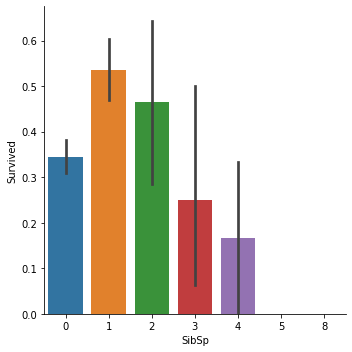

In [17]:
# based on family size survival rate 
sns.catplot(x='SibSp',y='Survived',data=train,kind='bar')

In [18]:
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style

In [19]:
pd.crosstab([train.Sex,train.Survived],[train.Pclass,train.Embarked],margins=True).style

In [20]:
# transforming data categorical to int ---- gender[female,male] to [0,1]]

genders = {'male':0,'female':1}
data=[train,test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)




In [21]:
len(data)

2

In [22]:
train.Sex.unique()

array([0, 1], dtype=int64)

In [23]:
test.Sex.unique()

array([0, 1], dtype=int64)

In [24]:
embark = {'S':0,'C':1,'Q':2}
data = [train,test]

for i in data:
    i['Embarked']=i['Embarked'].map(embark)

In [25]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [27]:
type(train)

pandas.core.frame.DataFrame

In [28]:
train.Embarked.unique()

array([ 0.,  1.,  2., nan])

In [29]:
test.Embarked.unique()

array([2, 0, 1], dtype=int64)

In [30]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

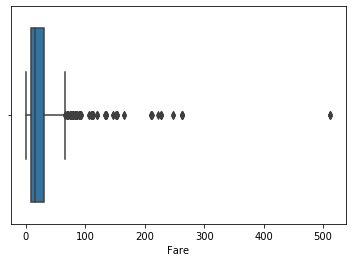

In [32]:
sns.boxplot(x=train.Fare,data=train)

In [33]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [34]:
# replacing na with 0 in 'Fare'
data = [train,test]

for i in data:
    i['Fare']=i['Fare'].fillna(0)

In [35]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [36]:
test.Fare

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [37]:
data = [train,test]

for i in data:
    i['Fare']=i['Fare'].astype(int)

In [38]:
test.Fare

0        7
1        7
2        9
3        8
4       12
      ... 
413      8
414    108
415      7
416      8
417     22
Name: Fare, Length: 418, dtype: int32

In [39]:
#checking null values for age
train[train["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8,NaN,2.0
17,18,1,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13,NaN,0.0
19,20,1,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7,NaN,1.0
26,27,0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7,NaN,1.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",0,NaN,0,0,2629,7,NaN,1.0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",1,NaN,8,2,CA. 2343,69,NaN,0.0
868,869,0,3,"van Melkebeke, Mr. Philemon",0,NaN,0,0,345777,9,NaN,0.0
878,879,0,3,"Laleff, Mr. Kristo",0,NaN,0,0,349217,7,NaN,0.0


In [40]:
train.Age.isnull().sum()

177

In [41]:
# combine train and test - this will add new column with index train and test  
data_train_test = pd.concat([train.assign(ind='train'),test.assign(ind='test')],ignore_index=True)
data_train_test.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
ind               0
dtype: int64

In [42]:
# finding the position where null in age 
# age_nan_pos = data_train_test[data_train_test['Age'].isnull()].index   
# for i in age_nan_pos:
#     mean_age = data_train_test["Age"][((data_train_test['Title']==data_train_test.iloc[i]["Title"]))]
#     data_train_test['Age'].iloc[i]=mean_age

In [43]:
# split test and train basd on ind
# test,train = data_train_test[data_train_test["ind"].eq("test")],data_train_test[data_train_test["ind"].eq("train")]


In [44]:
train.isnull().sum()
data_train_test["Age"].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1304     True
1305    False
1306    False
1307     True
1308     True
Name: Age, Length: 1309, dtype: bool

In [45]:

data_train_test['Age'].fillna(value=train['Age'].mean(),inplace=True)
#data_train_test["Age"]=data_train_test["Age"].replace(data_train_test["Age"].isnull(),0,inplace=True)
    
data_train_test.isnull().sum()


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
ind               0
dtype: int64

In [46]:
#seprating train and test again based on ind new column
test,train= data_train_test[data_train_test['ind'].eq('test')],data_train_test[data_train_test['ind'].eq('train')]

In [50]:
# coverting age int to category - bins/groups
data = [train,test]
for datataset in data:
    dataset["Age"] = datataset['Age'].astype(int)
    dataset.loc[dataset['Age'] <=15,'Age']=0
    dataset.loc[(dataset['Age']>15) & (dataset['Age']<=30),'Age']=1
    dataset.loc[(dataset['Age']>30) & (dataset['Age']<=45),'Age']=2
    dataset.loc[(dataset['Age']>45) & (dataset['Age']<=60),'Age']=3
    dataset.loc[dataset['Age'] >60,'Age']=4

In [66]:
train["Age"] = train['Age'].astype(int)
train.loc[train['Age'] <=15,'Age']=0
train.loc[(train['Age']>15) & (train['Age']<=30),'Age']=1
train.loc[(train['Age']>30) & (train['Age']<=45),'Age']=2
train.loc[(train['Age']>45) & (train['Age']<=60),'Age']=3
train.loc[train['Age'] >60,'Age']=4

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [74]:
test["Age"] = test['Age'].astype(int)
test.loc[test['Age'] <=15,'Age']=0
test.loc[(test['Age']>15) & (test['Age']<=30),'Age']=1
test.loc[(test['Age']>30) & (test['Age']<=45),'Age']=2
test.loc[(test['Age']>45) & (test['Age']<=60),'Age']=3
test.loc[test['Age'] >60,'Age']=4

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [75]:
test
   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ind
891,892,NaN,3,"Kelly, Mr. James",0,2,0,0,330911,7,NaN,2.0,test
892,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",1,3,1,0,363272,7,NaN,0.0,test
893,894,NaN,2,"Myles, Mr. Thomas Francis",0,4,0,0,240276,9,NaN,2.0,test
894,895,NaN,3,"Wirz, Mr. Albert",0,1,0,0,315154,8,NaN,0.0,test
895,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,12,NaN,0.0,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,1,0,0,A.5. 3236,8,NaN,0.0,test
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,2,0,0,PC 17758,108,C105,1.0,test
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,2,0,0,SOTON/O.Q. 3101262,7,NaN,0.0,test
1307,1308,NaN,3,"Ware, Mr. Frederick",0,1,0,0,359309,8,NaN,0.0,test


In [76]:
train.Age.unique()

array([1, 2, 3, 0, 4])

In [78]:
# dropping columns - cabin ,ticket and ind as not useful 
train.drop(labels=['Ticket','Cabin','ind'], axis=1,inplace=True)


KeyError: "['Ticket' 'Cabin' 'ind'] not found in axis"

In [79]:
test.drop(labels=['Ticket','Cabin','ind'], axis=1,inplace=True)

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [80]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,1,1,0,7,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,71,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,1,0,0,7,0.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,53,0.0
4,5,0.0,3,"Allen, Mr. William Henry",0,2,0,0,8,0.0
...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",0,1,0,0,13,0.0
887,888,1.0,1,"Graham, Miss. Margaret Edith",1,1,0,0,30,0.0
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,1,1,2,23,0.0
889,890,1.0,1,"Behr, Mr. Karl Howell",0,1,0,0,30,1.0


In [81]:
train.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1       0.0       3   
1              2       1.0       1   
2              3       1.0       3   
3              4       1.0       1   
4              5       0.0       3   
..           ...       ...     ...   
886          887       0.0       2   
887          888       1.0       1   
888          889       0.0       3   
889          890       1.0       1   
890          891       0.0       3   

                                                  Name  Sex  Age  SibSp  \
0                              Braund, Mr. Owen Harris    0    1      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1    2      1   
2                               Heikkinen, Miss. Laina    1    1      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1    2      1   
4                             Allen, Mr. William Henry    0    2      0   
..                                                 ...  ...  

In [83]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,1,1,0,7,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,71,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,1,0,0,7,0.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,53,0.0
4,5,0.0,3,"Allen, Mr. William Henry",0,2,0,0,8,0.0


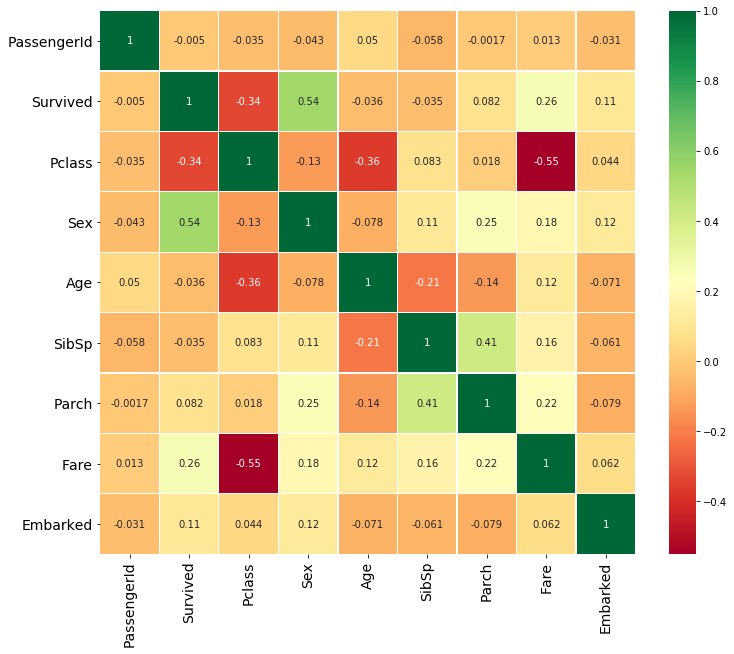

In [90]:
# corelation plot 
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws=None)
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [92]:
# new feature creation - familysize
data = [train,test]
for dataset in data:
    dataset['FamilySize'] = dataset["SibSp"]+dataset["Parch"]+1



C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [93]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",0,1,1,0,7,0.0,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,71,1.0,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,1,0,0,7,0.0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,53,0.0,2
4,5,0.0,3,"Allen, Mr. William Henry",0,2,0,0,8,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",0,1,0,0,13,0.0,1
887,888,1.0,1,"Graham, Miss. Margaret Edith",1,1,0,0,30,0.0,1
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,1,1,2,23,0.0,4
889,890,1.0,1,"Behr, Mr. Karl Howell",0,1,0,0,30,1.0,1


In [98]:
test[['FamilySize','Survived']].groupby(['FamilySize'],as_index=True)

In [109]:
# creating title column from Name columns - extracting titels from string 
data = [train,test]
titles = {'Mr':1, 'Miss':2,'Mrs':3,"Master":4,'Other':5}
for dataset in data:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
    dataset['Title'].replace(['Mile','Mme','Ms','Dr','Major','Lady'])
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    #filling NaN with 0, to get safe
    dataset['Title']= dataset['Title'].fillna(0)

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [112]:
train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [116]:
train = train.drop(['Name'],axis=1)


KeyError: "['Name'] not found in axis"

In [117]:
test = test.drop(['Name'],axis=1)

In [125]:
# fare --- is huge in range ...dividing in quat type - in 13 equal parts
train.Fare.unique()
data = [train,test]
for dataset in data:
    dataset['Fare']=pd.qcut(dataset['Fare'],13,labels=False)

ValueError: Bin edges must be unique: array([  0.,   7.,   7.,   7.,   8.,  10.,  13.,  15.,  24.,  26.,  33.,
        55.,  83., 512.]).
You can drop duplicate edges by setting the 'duplicates' kwarg